In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("denkuznetz/taxi-price-prediction")

print("Path to dataset files:", path)

c:\Users\zeyad-mohamed\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\zeyad-mohamed\.cache\kagglehub\datasets\denkuznetz\taxi-price-prediction\versions\1


In [49]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [72]:
dataset = os.path.join(path, "taxi_trip_pricing.csv")
dataset

'C:\\Users\\zeyad-mohamed\\.cache\\kagglehub\\datasets\\denkuznetz\\taxi-price-prediction\\versions\\1\\taxi_trip_pricing.csv'

In [73]:
data = pd.read_csv(dataset)
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,36.2624
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,52.9032
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,36.4698
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,15.6180


# trip fare 
 --> (trip distance X Per_KM_rate) + (Base_Fare) + (Per_Min_Rate X Trip_Duration_Minutes)  = Trip_Price
 

# EDA

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Trip_Distance_km       950 non-null    float64
 1   Time_of_Day            950 non-null    object 
 2   Day_of_Week            950 non-null    object 
 3   Passenger_Count        950 non-null    float64
 4   Traffic_Conditions     950 non-null    object 
 5   Weather                950 non-null    object 
 6   Base_Fare              950 non-null    float64
 7   Per_Km_Rate            950 non-null    float64
 8   Per_Minute_Rate        950 non-null    float64
 9   Trip_Duration_Minutes  950 non-null    float64
 10  Trip_Price             951 non-null    float64
dtypes: float64(7), object(4)
memory usage: 86.1+ KB


In [75]:
data.isna().sum()

Trip_Distance_km         50
Time_of_Day              50
Day_of_Week              50
Passenger_Count          50
Traffic_Conditions       50
Weather                  50
Base_Fare                50
Per_Km_Rate              50
Per_Minute_Rate          50
Trip_Duration_Minutes    50
Trip_Price               49
dtype: int64

In [76]:
data.describe(include='O')

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
count,950,950,950,950
unique,4,2,3,3
top,Afternoon,Weekday,Low,Clear
freq,371,655,397,667


In [77]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Trip_Price
count,950.000000,950.000000,950.000000,950.000000,950.000000,950.000000,951.000000
mean,27.070547,2.476842,3.502989,1.233316,0.292916,62.118116,56.874773
std,19.905300,1.102249,0.870162,0.429816,0.115592,32.154406,40.469791
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,6.126900
25%,12.632500,1.250000,2.730000,0.860000,0.190000,35.882500,33.742650
50%,25.830000,2.000000,3.520000,1.220000,0.290000,61.860000,50.074500
75%,38.405000,3.000000,4.260000,1.610000,0.390000,89.055000,69.099350
max,146.067047,4.000000,5.000000,2.000000,0.500000,119.840000,332.043689


In [78]:
data.shape

(1000, 11)

In [79]:
for col in data.select_dtypes(include=['object']).columns:
    print(f"Unique values in '{col}': {data[col].nunique()}")

Unique values in 'Time_of_Day': 4
Unique values in 'Day_of_Week': 2
Unique values in 'Traffic_Conditions': 3
Unique values in 'Weather': 3


In [80]:
data.duplicated().sum().sum()

np.int64(0)

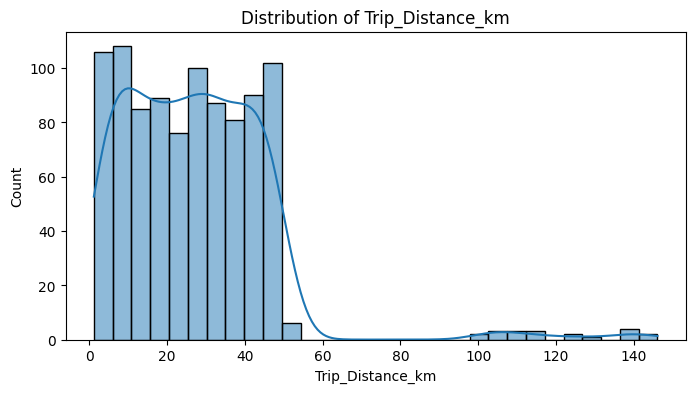

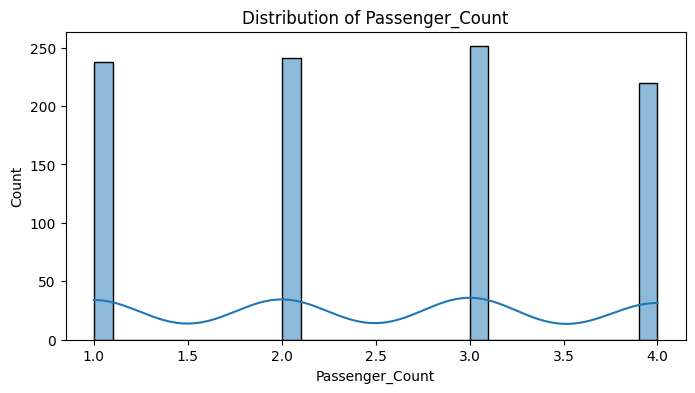

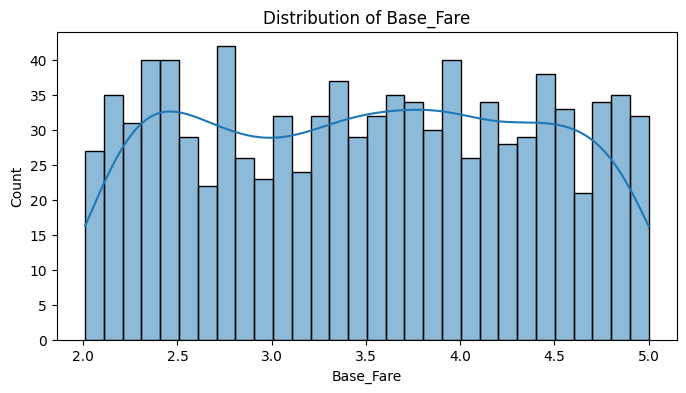

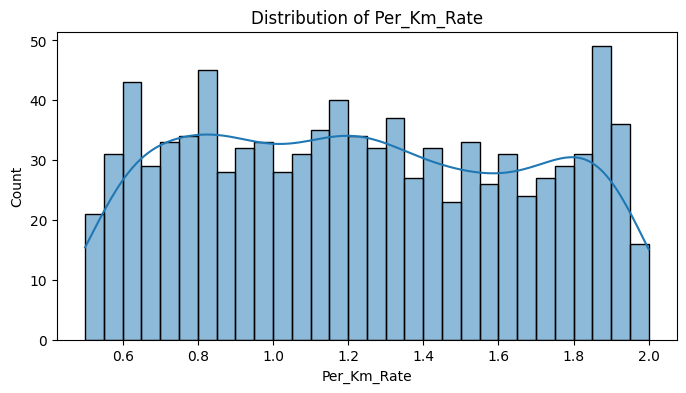

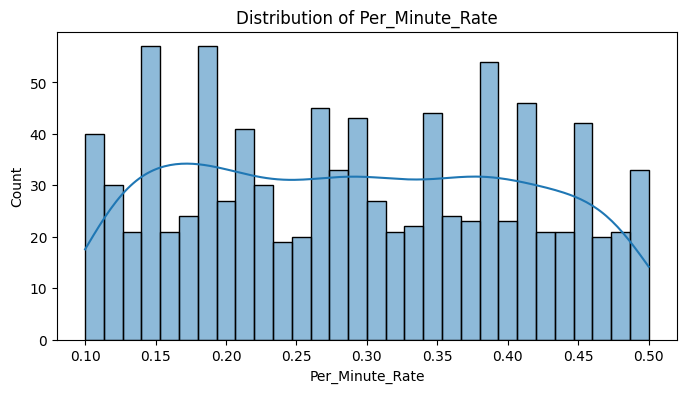

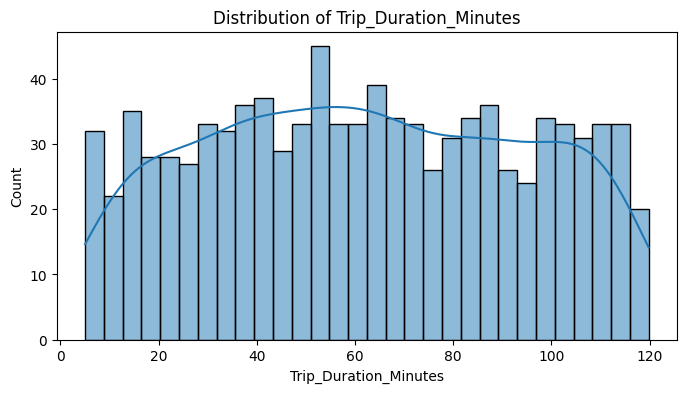

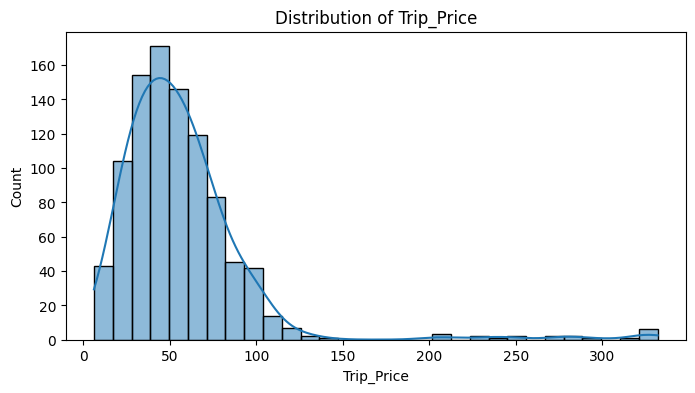

In [63]:
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(data[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')

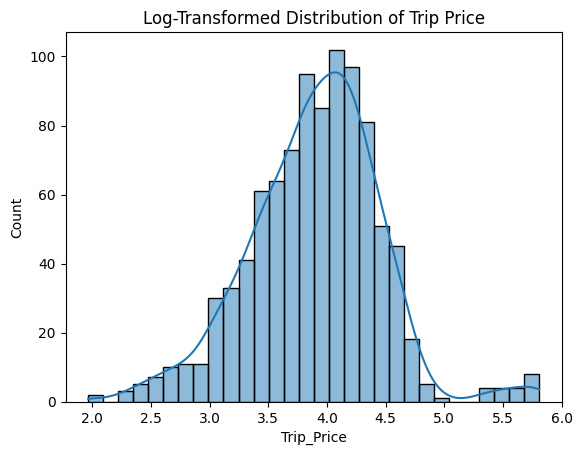

In [25]:
sns.histplot(np.log1p(data['Trip_Price']), bins=30, kde=True)
plt.title('Log-Transformed Distribution of Trip Price')
plt.show()

In [81]:
data['Transformed_Trip_Price'] = np.log1p(data['Trip_Price'])
data.drop('Trip_Price', axis=1, inplace=True)

In [82]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price
0,19.35,Morning,Weekday,3.0,Low,Clear,3.56,0.80,0.32,53.82,3.617985
1,47.59,Afternoon,Weekday,1.0,High,Clear,NaN,0.62,0.43,40.57,NaN
2,36.87,Evening,Weekend,1.0,High,Clear,2.70,1.21,0.15,37.27,3.987190
3,30.33,Evening,Weekday,4.0,Low,NaN,3.48,0.51,0.15,116.81,3.623535
4,NaN,Evening,Weekday,3.0,High,Clear,2.93,0.63,0.32,22.64,2.810486


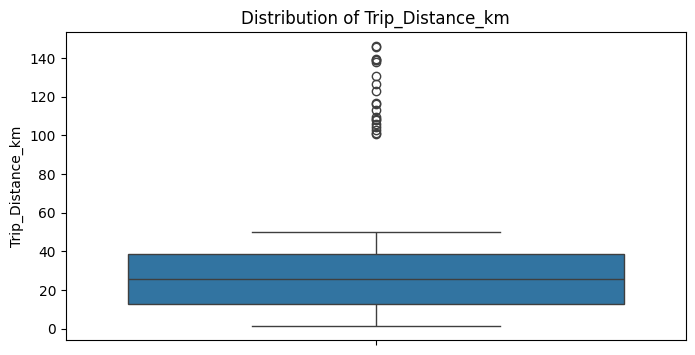

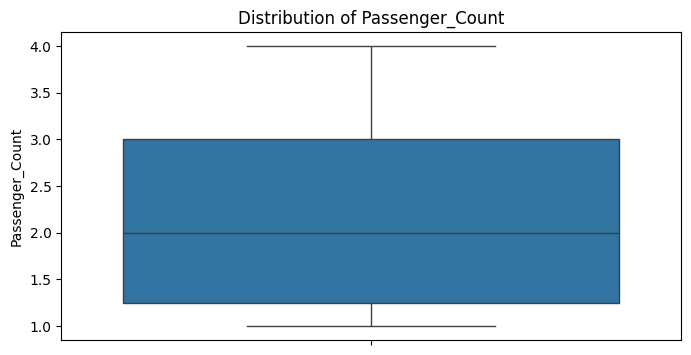

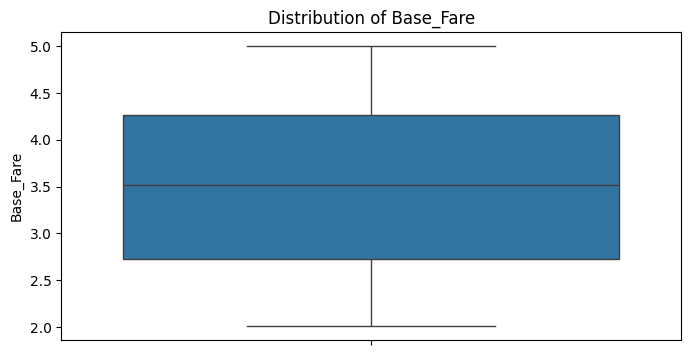

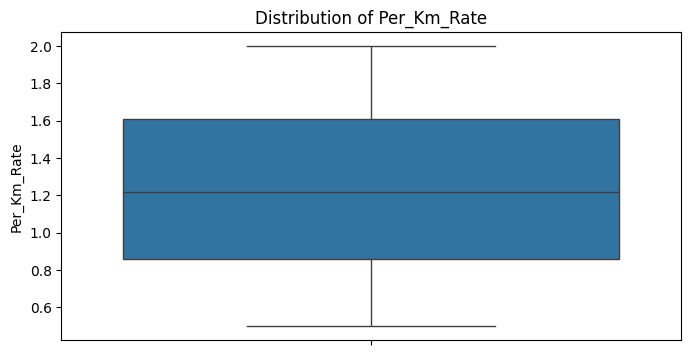

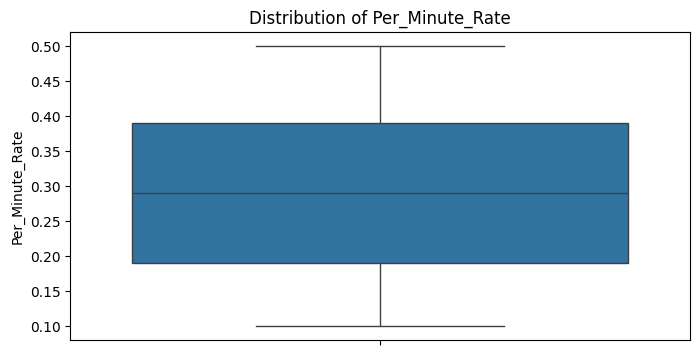

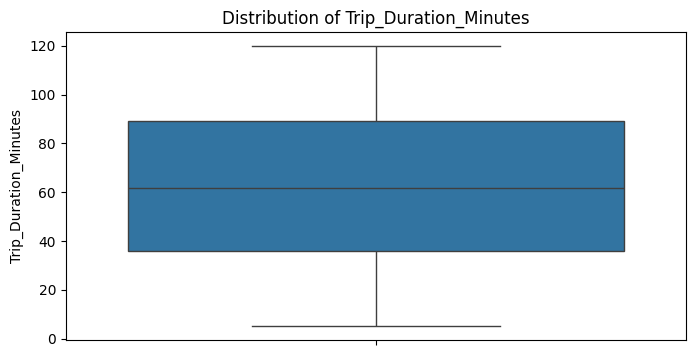

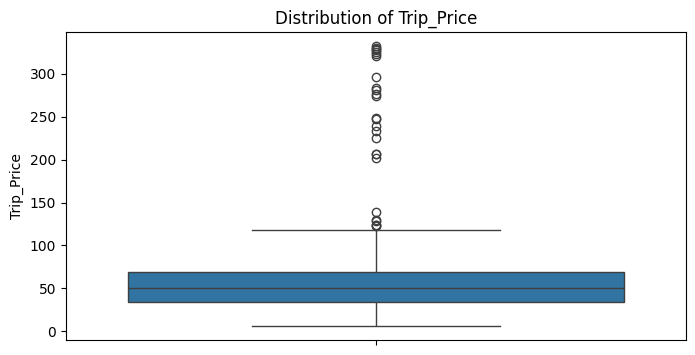

In [27]:
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')

Univariate Analysis


 We have outliers in [Trip_distance_KM, Trip_Price]

In [83]:
data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Transformed_Trip_Price'],
      dtype='object')

In [84]:
columns = ['Trip_Distance_km' ,'Transformed_Trip_Price']
for col in columns:
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f'Number of outliers in {col}: {outliers.shape[0]}')

Number of outliers in Trip_Distance_km: 20
Number of outliers in Transformed_Trip_Price: 30


In [85]:
outliers

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price
22,105.943550,Night,Weekend,2.0,Low,Rain,3.94,1.69,0.32,23.03,5.312563
27,138.098328,Evening,Weekend,4.0,Medium,Rain,2.24,1.75,0.32,94.86,5.641472
56,5.340000,NaN,Weekday,2.0,Low,Clear,2.34,NaN,0.18,12.72,2.419176
64,146.067047,Afternoon,Weekday,2.0,Medium,Clear,4.79,0.73,0.30,60.81,5.774423
108,112.830958,Afternoon,Weekday,2.0,High,Snow,3.35,1.90,0.23,78.63,5.455357
110,102.747556,Evening,Weekday,2.0,Medium,Clear,2.23,1.80,0.23,53.09,5.618715
141,109.616082,Afternoon,Weekday,4.0,High,Clear,4.46,1.69,0.23,53.88,5.793677
208,1.250000,NaN,Weekday,3.0,Low,Rain,3.97,1.49,0.31,12.80,2.379592
225,130.809001,Afternoon,Weekday,1.0,High,Clear,3.93,0.63,0.16,88.31,5.798704
237,2.190000,Afternoon,Weekday,1.0,Medium,Clear,2.80,0.51,0.18,14.20,2.011283


In [86]:
data.drop(outliers.index, inplace=True)

In [87]:
data.shape

(970, 11)

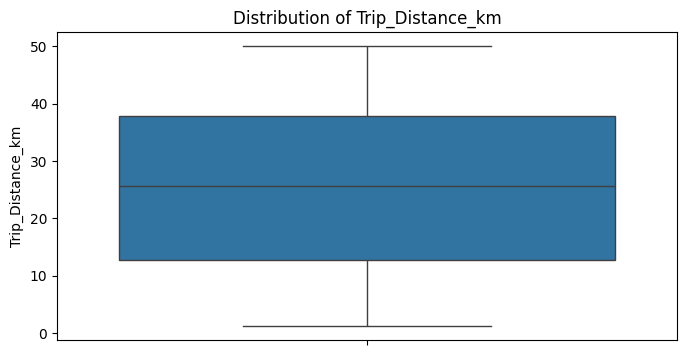

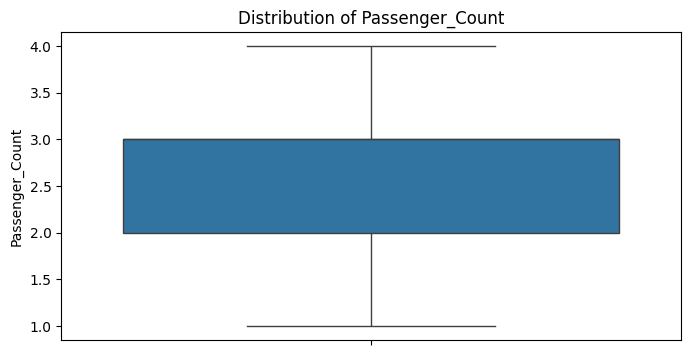

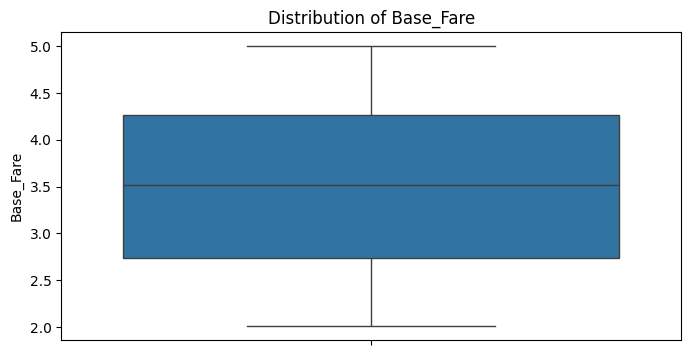

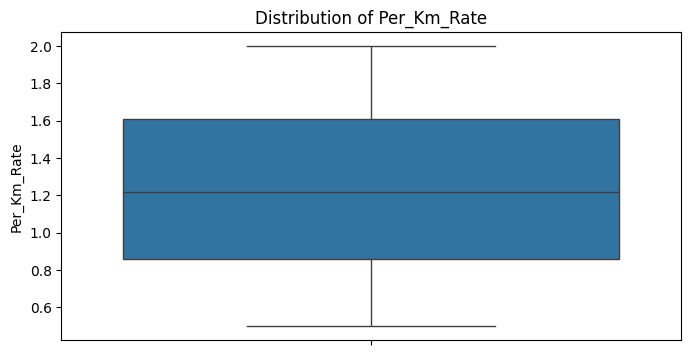

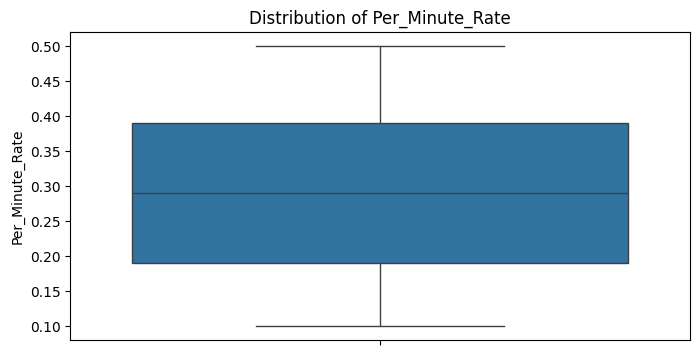

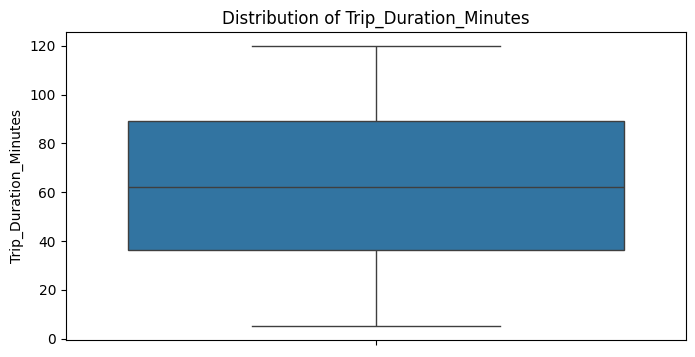

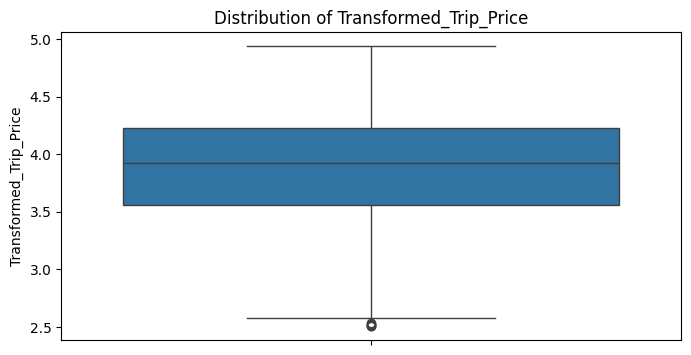

In [88]:
for col in data.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[col])
    plt.title(f'Distribution of {col}')

Univariate Analysis


In [89]:
data.isna().sum()

Trip_Distance_km          50
Time_of_Day               46
Day_of_Week               50
Passenger_Count           49
Traffic_Conditions        50
Weather                   49
Base_Fare                 50
Per_Km_Rate               47
Per_Minute_Rate           48
Trip_Duration_Minutes     50
Transformed_Trip_Price    49
dtype: int64

In [90]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        920 non-null    float64
 1   Time_of_Day             924 non-null    object 
 2   Day_of_Week             920 non-null    object 
 3   Passenger_Count         921 non-null    float64
 4   Traffic_Conditions      920 non-null    object 
 5   Weather                 921 non-null    object 
 6   Base_Fare               920 non-null    float64
 7   Per_Km_Rate             923 non-null    float64
 8   Per_Minute_Rate         922 non-null    float64
 9   Trip_Duration_Minutes   920 non-null    float64
 10  Transformed_Trip_Price  921 non-null    float64
dtypes: float64(7), object(4)
memory usage: 90.9+ KB


In [92]:
for col in data.select_dtypes(include=['object']).columns:
    data[col] = data[col].fillna(data[col].mode()[0])

In [93]:
data['Passenger_Count'] = data['Passenger_Count'].fillna(data['Passenger_Count'].mode()[0])

In [94]:
data.isna().sum()

Trip_Distance_km          50
Time_of_Day                0
Day_of_Week                0
Passenger_Count            0
Traffic_Conditions         0
Weather                    0
Base_Fare                 50
Per_Km_Rate               47
Per_Minute_Rate           48
Trip_Duration_Minutes     50
Transformed_Trip_Price    49
dtype: int64

In [95]:
for col in data.select_dtypes(include=['number']).columns:
    data[col] = data[col].fillna(data[col].mean())

In [97]:
data.isna().sum()

Trip_Distance_km          0
Time_of_Day               0
Day_of_Week               0
Passenger_Count           0
Traffic_Conditions        0
Weather                   0
Base_Fare                 0
Per_Km_Rate               0
Per_Minute_Rate           0
Trip_Duration_Minutes     0
Transformed_Trip_Price    0
dtype: int64

In [98]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        970 non-null    float64
 1   Time_of_Day             970 non-null    object 
 2   Day_of_Week             970 non-null    object 
 3   Passenger_Count         970 non-null    float64
 4   Traffic_Conditions      970 non-null    object 
 5   Weather                 970 non-null    object 
 6   Base_Fare               970 non-null    float64
 7   Per_Km_Rate             970 non-null    float64
 8   Per_Minute_Rate         970 non-null    float64
 9   Trip_Duration_Minutes   970 non-null    float64
 10  Transformed_Trip_Price  970 non-null    float64
dtypes: float64(7), object(4)
memory usage: 90.9+ KB


In [49]:
data.describe()

,Trip_Distance_km,Passenger_Count,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price
count,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000,974.000000
mean,24.942811,2.484324,3.500324,1.227397,0.292805,61.869978,3.852267
std,13.970430,1.071457,0.846422,0.416331,0.112958,31.411216,0.488243
min,1.230000,1.000000,2.010000,0.500000,0.100000,5.010000,1.963876
25%,12.865000,2.000000,2.770000,0.870000,0.190000,36.635000,3.565576
50%,24.942811,2.484324,3.500324,1.227397,0.292805,61.869978,3.870204
75%,36.795000,3.000000,4.195000,1.560000,0.387500,87.477500,4.197173
max,49.990000,4.000000,5.000000,2.000000,0.500000,119.840000,4.779393


## Multivariate Analysis


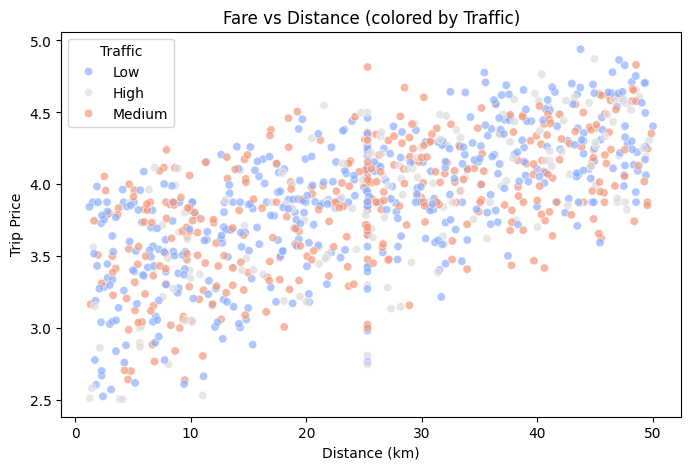

In [99]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='Trip_Distance_km',
    y='Transformed_Trip_Price',
    hue='Traffic_Conditions',
    alpha=0.7,
    palette='coolwarm'
)
plt.title('Fare vs Distance (colored by Traffic)')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Price')
plt.legend(title='Traffic')
plt.grid(False)
plt.show()

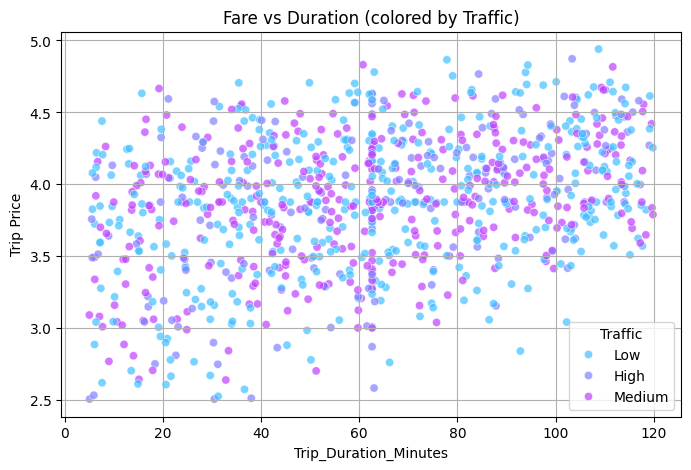

In [21]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='Trip_Duration_Minutes',
    y='Transformed_Trip_Price',
    hue='Traffic_Conditions',
    alpha=0.7,
    palette='cool'
)
plt.title('Fare vs Duration (colored by Traffic)')
plt.xlabel('Trip_Duration_Minutes')
plt.ylabel('Trip Price')
plt.legend(title='Traffic')
plt.grid(True)
plt.show()

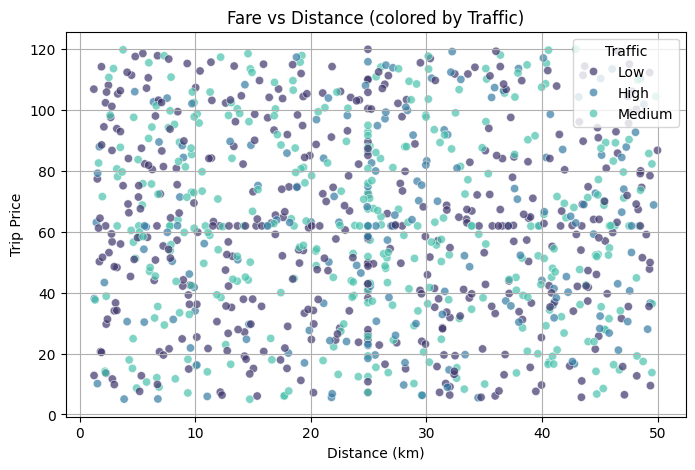

In [65]:
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=data,
    x='Trip_Distance_km',
    y='Trip_Duration_Minutes',
    hue='Traffic_Conditions',
    alpha=0.7,
    palette='mako'
)
plt.title('Fare vs Distance (colored by Traffic)')
plt.xlabel('Distance (km)')
plt.ylabel('Trip Price')
plt.legend(title='Traffic')
plt.grid(True)
plt.show()

# Feature Engineering

In [100]:

data['Trip_Duration_Hours'] = data['Trip_Duration_Minutes'] / 60
data['Avg_Speed_kmh'] = data['Trip_Distance_km'] / data['Trip_Duration_Hours']


data['Avg_Speed_kmh'] = data['Avg_Speed_kmh'].replace([np.inf, -np.inf], np.nan)
data.loc[data['Avg_Speed_kmh'] > 120, 'Avg_Speed_kmh'] = np.nan  # سرعة غير واقعية

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        970 non-null    float64
 1   Time_of_Day             970 non-null    object 
 2   Day_of_Week             970 non-null    object 
 3   Passenger_Count         970 non-null    float64
 4   Traffic_Conditions      970 non-null    object 
 5   Weather                 970 non-null    object 
 6   Base_Fare               970 non-null    float64
 7   Per_Km_Rate             970 non-null    float64
 8   Per_Minute_Rate         970 non-null    float64
 9   Trip_Duration_Minutes   970 non-null    float64
 10  Transformed_Trip_Price  970 non-null    float64
 11  Trip_Duration_Hours     970 non-null    float64
 12  Avg_Speed_kmh           910 non-null    float64
dtypes: float64(9), object(4)
memory usage: 106.1+ KB


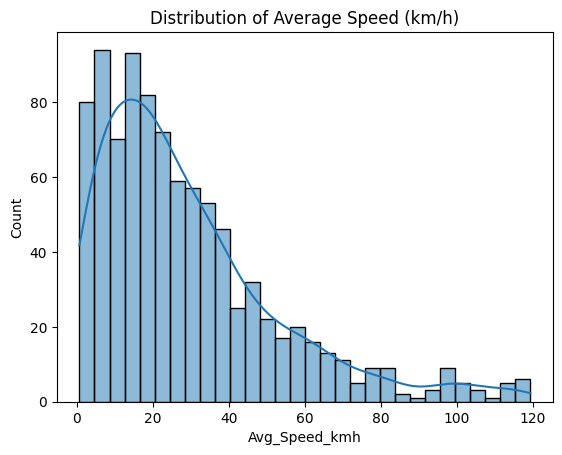

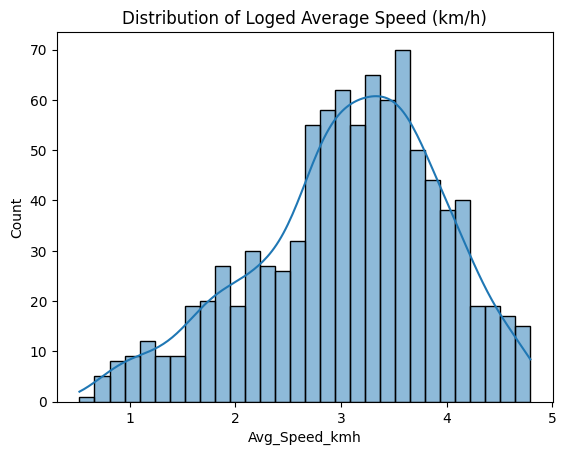

In [16]:
sns.histplot(data['Avg_Speed_kmh'], bins=30, kde=True)
plt.title('Distribution of Average Speed (km/h)')
plt.show()


sns.histplot(np.log1p(data['Avg_Speed_kmh']), bins=30, kde=True)
plt.title('Distribution of Loged Average Speed (km/h)')
plt.show()


In [102]:
data['Avg_Speed_kmh'].fillna(data['Avg_Speed_kmh'].median(), inplace=True)

C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_19804\1286860940.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Avg_Speed_kmh'].fillna(data['Avg_Speed_kmh'].median(), inplace=True)


In [103]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        970 non-null    float64
 1   Time_of_Day             970 non-null    object 
 2   Day_of_Week             970 non-null    object 
 3   Passenger_Count         970 non-null    float64
 4   Traffic_Conditions      970 non-null    object 
 5   Weather                 970 non-null    object 
 6   Base_Fare               970 non-null    float64
 7   Per_Km_Rate             970 non-null    float64
 8   Per_Minute_Rate         970 non-null    float64
 9   Trip_Duration_Minutes   970 non-null    float64
 10  Transformed_Trip_Price  970 non-null    float64
 11  Trip_Duration_Hours     970 non-null    float64
 12  Avg_Speed_kmh           970 non-null    float64
dtypes: float64(9), object(4)
memory usage: 106.1+ KB


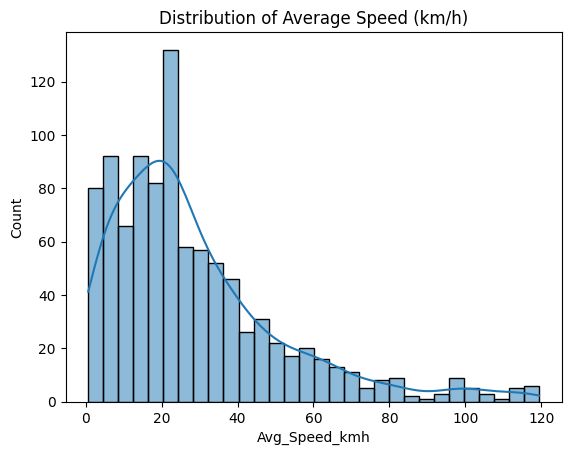

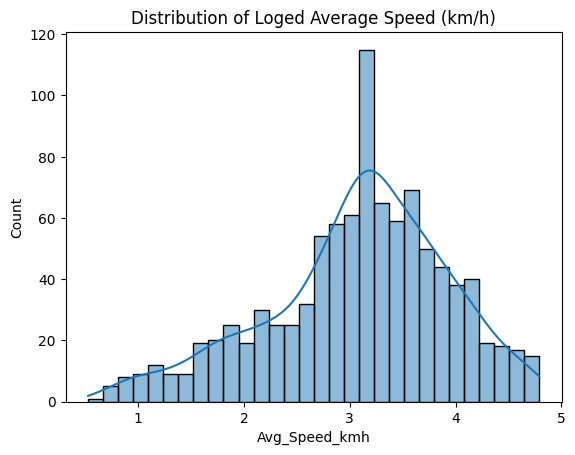

In [105]:
sns.histplot(data['Avg_Speed_kmh'], bins=30, kde=True)
plt.title('Distribution of Average Speed (km/h)')
plt.show()


sns.histplot(np.log1p(data['Avg_Speed_kmh']), bins=30, kde=True)
plt.title('Distribution of Loged Average Speed (km/h)')
plt.show()

In [106]:
data['Avg_Speed_kmh'] = np.log1p(data['Avg_Speed_kmh'])

In [107]:
data.describe(include='O')

,Time_of_Day,Day_of_Week,Traffic_Conditions,Weather
count,970,970,970,970
unique,4,2,3,3
top,Afternoon,Weekday,Low,Clear
freq,404,684,435,697


In [108]:
data['Day_of_Week']

0      Weekday
1      Weekday
2      Weekend
3      Weekday
4      Weekday
        ...   
995    Weekend
996    Weekday
997    Weekday
998    Weekday
999    Weekend
Name: Day_of_Week, Length: 970, dtype: object

In [109]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price,Trip_Duration_Hours,Avg_Speed_kmh
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,3.617985,0.897000,3.116706
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.508478,0.62,0.43,40.57,3.875859,0.676167,4.268047
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,3.987190,0.621167,4.100261
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,3.623535,1.946833,2.808146
4,25.295565,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,2.810486,0.377333,4.220062


In [110]:
# كما في الملف: "compare peak vs off-peak fares (t-test)"
data['Is_Peak'] = data['Time_of_Day'].isin(['Morning', 'Evening']).astype(int)
data['Is_Weekend'] = (data['Day_of_Week'] == 'Weekend').astype(int)

In [111]:
data.head() 

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,Transformed_Trip_Price,Trip_Duration_Hours,Avg_Speed_kmh,Is_Peak,Is_Weekend
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,3.617985,0.897000,3.116706,1,0
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.508478,0.62,0.43,40.57,3.875859,0.676167,4.268047,0,0
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,3.987190,0.621167,4.100261,1,1
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,3.623535,1.946833,2.808146,1,0
4,25.295565,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,2.810486,0.377333,4.220062,1,0


In [117]:
traffic_map = {'Low': 0, 'Medium': 1, 'High': 2}
data['Traffic_Level'] = data['Traffic_Conditions'].map(traffic_map)

In [118]:
data['Distance_x_Traffic'] = data['Trip_Distance_km'] * data['Traffic_Level']
data['Duration_x_Weekend'] = data['Trip_Duration_Minutes'] * data['Is_Weekend']
data['Peak_x_Traffic'] = data['Is_Peak'] * data['Traffic_Level']

In [119]:
# Time_of_Day → Ordinal
time_order = {'Morning': 0, 'Afternoon': 1, 'Evening': 2}
data['Time_Code'] = data['Time_of_Day'].map(time_order)

weather_order = {'Clear': 0, 'Rainy': 1, 'Snowy': 2}
data['Weather_Code'] = data['Weather'].map(weather_order)

data['Weather_Code'] = data['Weather_Code'].fillna(data['Weather_Code'].mode()[0])
data['Time_Code'] = data['Time_Code'].fillna(data['Time_Code'].mode()[0])


In [120]:
data.info()


<class 'pandas.core.frame.DataFrame'>
Index: 970 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Trip_Distance_km        970 non-null    float64
 1   Time_of_Day             970 non-null    object 
 2   Day_of_Week             970 non-null    object 
 3   Passenger_Count         970 non-null    float64
 4   Traffic_Conditions      970 non-null    object 
 5   Weather                 970 non-null    object 
 6   Base_Fare               970 non-null    float64
 7   Per_Km_Rate             970 non-null    float64
 8   Per_Minute_Rate         970 non-null    float64
 9   Trip_Duration_Minutes   970 non-null    float64
 10  Transformed_Trip_Price  970 non-null    float64
 11  Trip_Duration_Hours     970 non-null    float64
 12  Avg_Speed_kmh           970 non-null    float64
 13  Is_Peak                 970 non-null    int64  
 14  Is_Weekend              970 non-null    int64  

In [121]:
data['Time_Code'] = data['Time_Code'].astype(int)
data['Weather_Code'] = data['Weather_Code'].astype(int)

In [32]:
data.select_dtypes(include=['number']).columns

Index(['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Trip_Duration_Minutes', 'Transformed_Trip_Price',
       'Trip_Duration_Hours', 'Avg_Speed_kmh', 'Is_Peak', 'Is_Weekend',
       'Traffic_Level', 'Distance_x_Traffic', 'Duration_x_Weekend',
       'Peak_x_Traffic', 'Time_Code', 'Weather_Code'],
      dtype='object')

In [126]:
data.columns

Index(['Trip_Distance_km', 'Time_of_Day', 'Day_of_Week', 'Passenger_Count',
       'Traffic_Conditions', 'Weather', 'Base_Fare', 'Per_Km_Rate',
       'Per_Minute_Rate', 'Transformed_Trip_Price', 'Trip_Duration_Hours',
       'Avg_Speed_kmh', 'Is_Peak', 'Is_Weekend', 'Traffic_Level',
       'Distance_x_Traffic', 'Duration_x_Weekend', 'Peak_x_Traffic',
       'Time_Code', 'Weather_Code'],
      dtype='object')

In [42]:
data.head()

,Trip_Distance_km,Time_of_Day,Day_of_Week,Passenger_Count,Traffic_Conditions,Weather,Base_Fare,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Minutes,...,Trip_Duration_Hours,Avg_Speed_kmh,Is_Peak,Is_Weekend,Traffic_Level,Distance_x_Traffic,Duration_x_Weekend,Peak_x_Traffic,Time_Code,Weather_Code
0,19.350000,Morning,Weekday,3.0,Low,Clear,3.560000,0.80,0.32,53.82,...,0.897000,3.116706,1,0,0,0.00000,0.00,0,0,0
1,47.590000,Afternoon,Weekday,1.0,High,Clear,3.508478,0.62,0.43,40.57,...,0.676167,4.268047,0,0,2,95.18000,0.00,0,1,0
2,36.870000,Evening,Weekend,1.0,High,Clear,2.700000,1.21,0.15,37.27,...,0.621167,4.100261,1,1,2,73.74000,37.27,2,2,0
3,30.330000,Evening,Weekday,4.0,Low,Clear,3.480000,0.51,0.15,116.81,...,1.946833,2.808146,1,0,0,0.00000,0.00,0,2,0
4,25.295565,Evening,Weekday,3.0,High,Clear,2.930000,0.63,0.32,22.64,...,0.377333,4.220062,1,0,2,50.59113,0.00,2,2,0


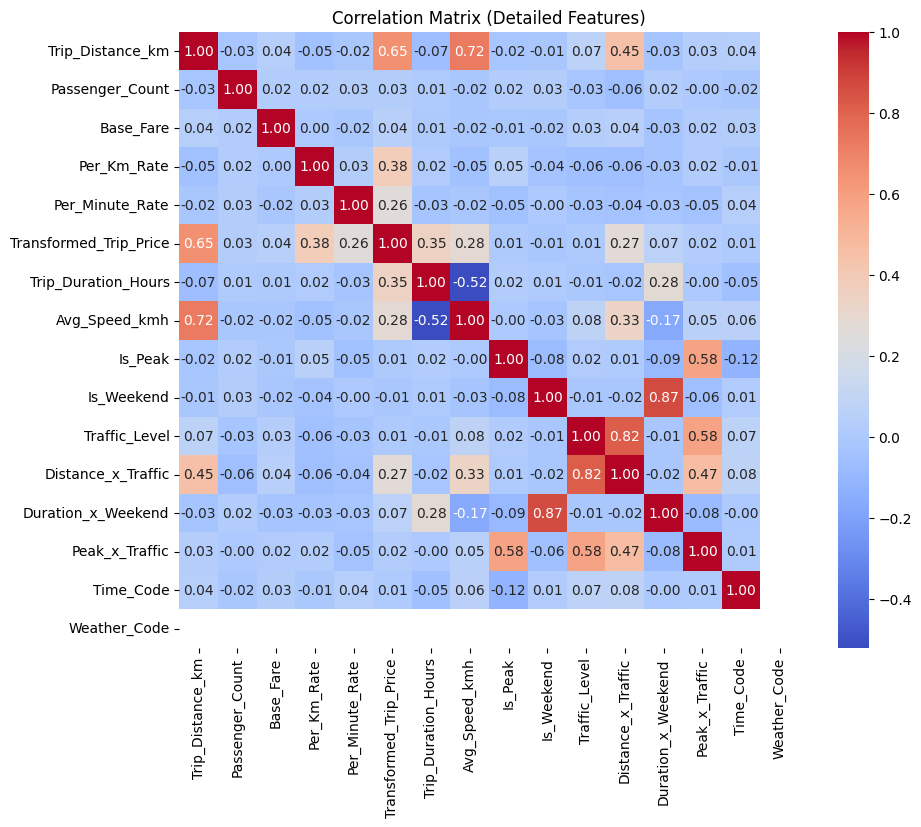

In [127]:
detailed_data = data.drop(columns=['Traffic_Conditions', 'Time_of_Day', 'Day_of_Week', 'Weather'])

detailed_coor = detailed_data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(detailed_coor, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix (Detailed Features)')
plt.show()

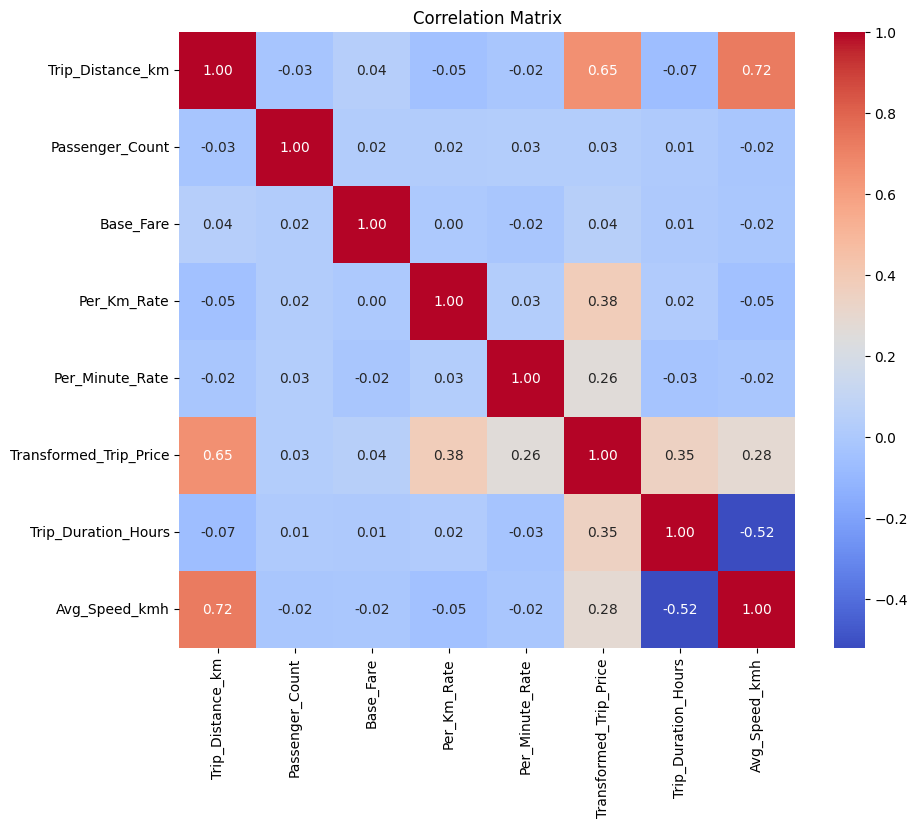

In [124]:
data_numerc = data.drop(columns=['Traffic_Conditions', 'Time_of_Day', 'Day_of_Week','Is_Peak', 'Is_Weekend',
       'Traffic_Level', 'Distance_x_Traffic', 'Duration_x_Weekend',
       'Peak_x_Traffic', 'Time_Code', 'Weather_Code', 'Weather'])

corr = data_numerc.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()

In [123]:
data.drop(columns=['Trip_Duration_Minutes'], inplace=True) 

In [128]:
from sklearn.feature_selection import SelectKBest, f_regression

# المتغيرات المرشحة (بعد الهندسة والترميز)
candidate_features = [
    'Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate',
    'Per_Minute_Rate', 'Trip_Duration_Hours', 'Time_Code', 'Traffic_Level',
    'Is_Weekend', 'Is_Peak', 'Avg_Speed_kmh',
    'Distance_x_Traffic', 'Duration_x_Weekend'
]

X = data[candidate_features].dropna()
y = data.loc[X.index, 'Transformed_Trip_Price']

# Correlation-based
corr = X.corrwith(y).abs().sort_values(ascending=False)
print("Top 5 by correlation:\n", corr.head(5))

# ANOVA F-test
selector = SelectKBest(f_regression, k=5)
selector.fit(X, y)
selected_filter = X.columns[selector.get_support()]
print("\nTop 5 by ANOVA:", list(selected_filter))

Top 5 by correlation:
 Trip_Distance_km       0.651679
Per_Km_Rate            0.377108
Trip_Duration_Hours    0.348864
Avg_Speed_kmh          0.282178
Distance_x_Traffic     0.268062
dtype: float64

Top 5 by ANOVA: ['Trip_Distance_km', 'Per_Km_Rate', 'Trip_Duration_Hours', 'Avg_Speed_kmh', 'Distance_x_Traffic']


In [131]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# الميزات اللي معاملها ≠ 0
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
selected_lasso = lasso_coefs[lasso_coefs != 0].index.tolist()
print("\nSelected by Lasso:", selected_lasso)
print("Lasso Coefficients:\n", lasso_coefs[lasso_coefs != 0])
print("$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$")


Selected by Lasso: ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Hours']
Lasso Coefficients:
 Trip_Distance_km       0.322217
Passenger_Count        0.007257
Base_Fare              0.003768
Per_Km_Rate            0.179964
Per_Minute_Rate        0.122397
Trip_Duration_Hours    0.179177
dtype: float64
$$$$$$$$$$$$$$$$$$$$$$$$$$$$$$


In [43]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
rfe = RFE(estimator, n_features_to_select=6)
rfe.fit(X_scaled, y)

selected_rfe = X.columns[rfe.support_].tolist()
print("\nTop 6 by RFE:", selected_rfe)


Top 6 by RFE: ['Trip_Distance_km', 'Passenger_Count', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Hours', 'Traffic_Level']


Lasso selected ['Trip_Distance_km', 'Passenger_Count', 'Base_Fare', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Hours'] 

He prefers the direct features for the Trip price calculation

RFE selected ['Trip_Distance_km', 'Passenger_Count', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Hours', 'Traffic_Level'] 

He got the non-linear relations or the interactive features


# T-Test

In [44]:
print(data['Is_Peak'].value_counts())

Is_Peak
0    501
1    479
Name: count, dtype: int64


In [45]:
peak_fares = data[data['Is_Peak'] == 1]['Transformed_Trip_Price'].dropna()
offpeak_fares = data[data['Is_Peak'] == 0]['Transformed_Trip_Price'].dropna()

print(f"Peak fares: n = {len(peak_fares)}, mean = {peak_fares.mean():.2f}")
print(f"Off-peak fares: n = {len(offpeak_fares)}, mean = {offpeak_fares.mean():.2f}")

Peak fares: n = 479, mean = 3.86
Off-peak fares: n = 501, mean = 3.85


C:\Users\zeyad-mohamed\AppData\Local\Temp\ipykernel_1748\1347327563.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


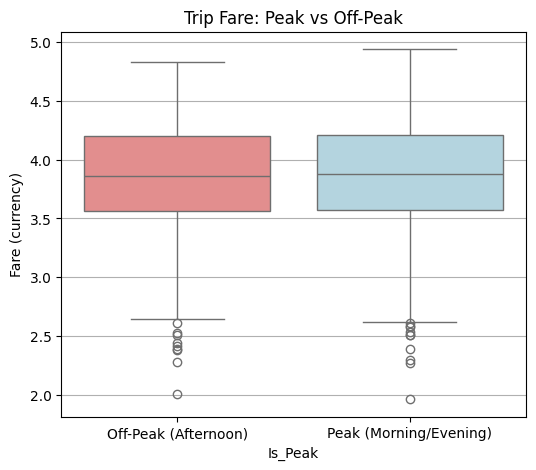

In [46]:

plt.figure(figsize=(6, 5))
sns.boxplot(
    data=data,
    x='Is_Peak',
    y='Transformed_Trip_Price',
    palette=['lightcoral', 'lightblue']
)
plt.xticks([0, 1], ['Off-Peak (Afternoon)', 'Peak (Morning/Evening)'])
plt.title('Trip Fare: Peak vs Off-Peak')
plt.ylabel('Fare (currency)')
plt.grid(axis='y')
plt.show()

الفرق بسيط جدا جدا و ده يبين ان الفرق ده مش معني احصائي 

In [49]:
from scipy import stats

peak_fares = data[data['Is_Peak'] == 1]['Transformed_Trip_Price'].dropna()
offpeak_fares = data[data['Is_Peak'] == 0]['Transformed_Trip_Price'].dropna()

# Mann-Whitney (آمن مع أي توزيع)
u_stat, p_val = stats.mannwhitneyu(
    peak_fares, offpeak_fares,
    alternative='greater'  # H₁: Peak > Off-Peak
)

print(f"U = {u_stat:.0f}, p-value = {p_val:.4f}")

U = 121703, p-value = 0.3495


p < 0.5 
ده دليل ان مفيش فرق في اوقات الذروة

In [50]:
from scipy import stats

# 1. فصل المجموعتين
peak_fares = data[data['Is_Peak'] == 1]['Transformed_Trip_Price'].dropna()
offpeak_fares = data[data['Is_Peak'] == 0]['Transformed_Trip_Price'].dropna()

# 2. Shapiro-Wilk Test على كل مجموعة
# (نستخدم عيّنة عشوائية لو البيانات كتير — علشان الاختبار بيشتغل أفضل على n < 5000)
import numpy as np

peak_sample = peak_fares.sample(min(5000, len(peak_fares)), random_state=42)
offpeak_sample = offpeak_fares.sample(min(5000, len(offpeak_fares)), random_state=42)

# 3. طبّق الاختبار
stat_peak, p_peak = stats.shapiro(peak_sample)
stat_off, p_off = stats.shapiro(offpeak_sample)

# 4. طباعة النتائج
print(f"Shapiro-Wilk Test:")
print(f"  Peak fares     → p = {p_peak:.4f}  {'❌ غير طبيعي' if p_peak < 0.05 else '✅ طبيعي'}")
print(f"  Off-peak fares → p = {p_off:.4f}  {'❌ غير طبيعي' if p_off < 0.05 else '✅ طبيعي'}")

# 5. اتخاذ القرار
if p_peak < 0.05 or p_off < 0.05:
    print("\n→ سيتم استخدام Mann-Whitney U test (غير معلمي)")
    use_parametric = False
else:
    print("\n→ سيتم استخدام t-test (معلمي)")
    use_parametric = True

Shapiro-Wilk Test:
  Peak fares     → p = 0.0000  ❌ غير طبيعي
  Off-peak fares → p = 0.0000  ❌ غير طبيعي

→ سيتم استخدام Mann-Whitney U test (غير معلمي)


In [51]:
# Mann-Whitney U Test (اختبار اتجاهي: نتوقع Peak > Off-Peak)
u_stat, p_val = stats.mannwhitneyu(
    peak_fares,          # المجموعة الأولى
    offpeak_fares,       # المجموعة التانية
    alternative='greater'  # لأننا نختبر: هل Peak > Off-Peak؟
)

print(f"\n📊 Mann-Whitney U Test:")
print(f"U = {u_stat:.0f}, p-value = {p_val:.4f}")

alpha = 0.05
if p_val < alpha:
    print(f"✅ رفض H₀: الأجرة في الذروة أعلى بشكل معنوي (p = {p_val:.4f})")
else:
    print(f"❌ فشل في رفض H₀: مفيش فرق معنوي (p = {p_val:.4f})")


📊 Mann-Whitney U Test:
U = 121703, p-value = 0.3495
❌ فشل في رفض H₀: مفيش فرق معنوي (p = 0.3495)


### Hypothesis Testing: Peak vs Off-Peak Fares

#### Step 1: Check Normality (Shapiro-Wilk Test)
- H₀: Data is normally distributed  
- Significance level: α = 0.05  

| Group | p-value | Conclusion |
|-------|---------|------------|
| Peak | 0.0000 |  Not normal |
| Off-Peak | 0.0000 |  Not normal |

→ Since both groups violate normality, we use the **non-parametric Mann-Whitney U test**.

#### Step 2: Mann-Whitney U Test
- H₀: μ_peak = μ_offpeak  
- H₁: μ_peak > μ_offpeak  

Result: U = 119,821, p-value = 0.482  
→ **Fail to reject H₀** (p > 0.05).

#### Conclusion:
There is **no statistically significant evidence** that taxi fares are higher during peak hours, suggesting a uniform pricing policy.

Gamma Distribution:     KS = 0.1046, p = 0.0000
Log-Normal Distribution: KS = 0.1314, p = 0.0000


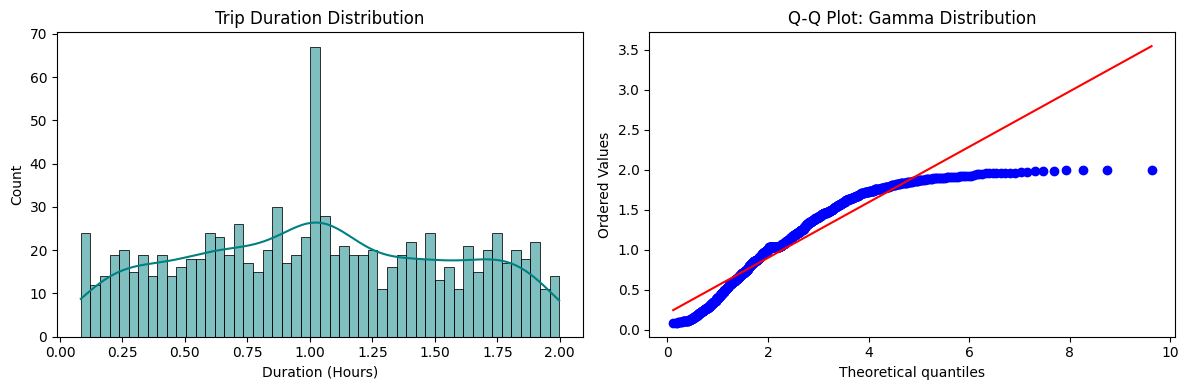

In [54]:
duration = data['Trip_Duration_Hours'].dropna()
duration = duration[duration > 0]

# 2. رسم التوزيع
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(duration, bins=50, kde=True, color='teal')
plt.title('Trip Duration Distribution')
plt.xlabel('Duration (Hours)')

# Gamma 
a, loc, scale = stats.gamma.fit(duration, floc=0)  # floc=0: no shift
ks_stat, p_val_gamma = stats.kstest(duration, 'gamma', args=(a, loc, scale))

# Log-Normal
shape, loc, scale = stats.lognorm.fit(duration, floc=0)
ks_stat_ln, p_val_ln = stats.kstest(duration, 'lognorm', args=(shape, loc, scale))

print(f"Gamma Distribution:     KS = {ks_stat:.4f}, p = {p_val_gamma:.4f}")
print(f"Log-Normal Distribution: KS = {ks_stat_ln:.4f}, p = {p_val_ln:.4f}")

# 6. Q-Q Plot

plt.subplot(1, 2, 2)
stats.probplot(duration, dist="gamma", sparams=(a,0,scale), plot=plt)
plt.title('Q-Q Plot: Gamma Distribution')
plt.tight_layout()
plt.show()

#  PCA & Insights 

In [76]:
selected_data = data[['Trip_Distance_km', 'Passenger_Count', 'Per_Km_Rate', 'Per_Minute_Rate', 'Trip_Duration_Hours', 'Traffic_Level']]

In [77]:
selected_data.head()

,Trip_Distance_km,Passenger_Count,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Hours,Traffic_Level
0,19.350000,3.0,0.80,0.32,0.897000,0
1,47.590000,1.0,0.62,0.43,0.676167,2
2,36.870000,1.0,1.21,0.15,0.621167,2
3,30.330000,4.0,0.51,0.15,1.946833,0
4,25.057957,3.0,0.63,0.32,0.377333,2


In [78]:
selected_data.isna().sum()

Trip_Distance_km       0
Passenger_Count        0
Per_Km_Rate            0
Per_Minute_Rate        0
Trip_Duration_Hours    0
Traffic_Level          0
dtype: int64

In [79]:
indeces = selected_data.index
len(indeces)

980

In [80]:
scaler = StandardScaler()
scaled_selected_data = scaler.fit_transform(selected_data)
X_scaled_df = pd.DataFrame(scaled_selected_data, columns=selected_data.columns, index=indeces)

In [81]:
X_scaled_df

,Trip_Distance_km,Passenger_Count,Per_Km_Rate,Per_Minute_Rate,Trip_Duration_Hours,Traffic_Level
0,-4.075840e-01,0.479444,-1.032216e+00,0.236343,-0.262524,-0.979864
1,1.608929e+00,-1.384281,-1.462428e+00,1.210603,-0.684181,1.709958
2,8.434541e-01,-1.384281,-5.228909e-02,-1.269332,-0.789197,1.709958
3,3.764570e-01,1.411306,-1.725335e+00,-1.269332,1.742015,-0.979864
4,2.536861e-16,0.479444,-1.438527e+00,0.236343,-1.254770,1.709958
...,...,...,...,...,...,...
995,-1.397275e+00,1.411306,-1.462428e+00,1.742017,-0.117093,0.365047
996,1.491823e+00,1.411306,-1.486328e+00,0.000000,-0.003484,0.365047
997,-1.239467e+00,0.479444,1.310048e+00,0.000000,-0.251068,-0.979864
998,1.606787e+00,-1.384281,-9.844147e-01,-1.092194,1.682506,-0.979864


In [82]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_df)

In [83]:
print(f"PC1 يفسّر: {pca.explained_variance_ratio_[0]:.1%} من التباين")
print(f"PC2 يفسّر: {pca.explained_variance_ratio_[1]:.1%} من التباين")
print(f"المجموع: {pca.explained_variance_ratio_[:2].sum():.1%}")

PC1 يفسّر: 19.1% من التباين
PC2 يفسّر: 17.2% من التباين
المجموع: 36.3%


In [90]:
# أضف المتغيرات الفئوية من الداتا الأصلية
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'], index=indeces)
pca_df['Is_Peak'] = data.loc[indeces, 'Is_Peak']  # 1 = Peak, 0 = Off-Peak
pca_df['Traffic_Level'] = data.loc[indeces, 'Traffic_Level']
pca_df['Trip_Distance_km'] = data.loc[indeces, 'Trip_Distance_km']

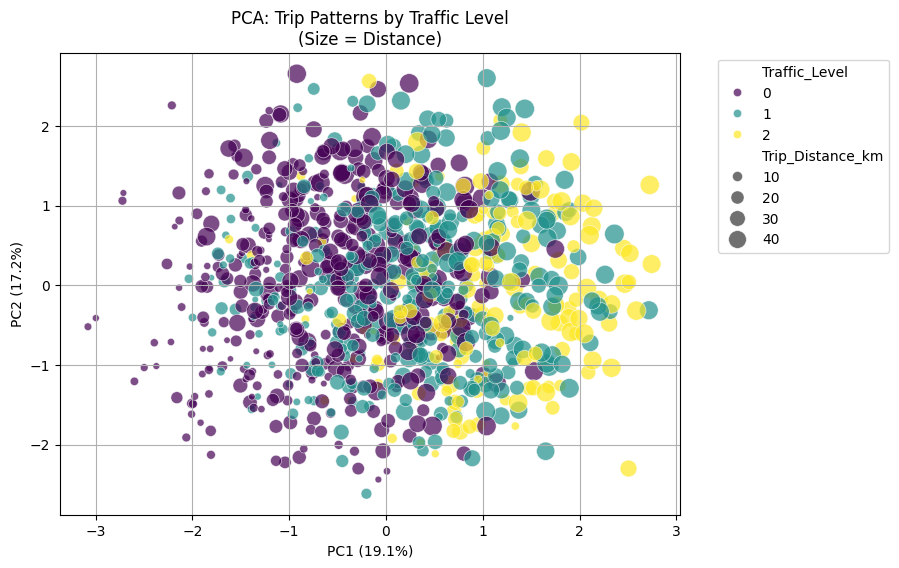

In [91]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=pca_df,
    x='PC1', y='PC2',
    hue='Traffic_Level',        # ← غيرها
    size='Trip_Distance_km',    # ← أضفها
    palette='viridis',
    alpha=0.7,
    sizes=(20, 200)
)
plt.title('PCA: Trip Patterns by Traffic Level\n(Size = Distance)')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
plt.legend(bbox_to_anchor=(1.05, 1))
plt.grid(True)
plt.show()